# Увод и опис проблема

У овој вежбанци ћемо се бавити анализом сателитских снимака Земље у циљу идентификације намена површина. У различитим применама је од интереса идентификовати која је реална намена земљишта (ораница, шума, насеље, индустрија...). Стручна особа може увидом у сателитске снимке извршити овакву идентификацију намене земљишта, али је у том случају то мукотрпан и скуп посао, подложан грешкама, а који је тешко и неисплативо редовно радити. Као вид вештачке интелигенције, ми ћемо користити моделе машинског учења ради аутоматске анализе намене земљишта са датог сателитског снимка.

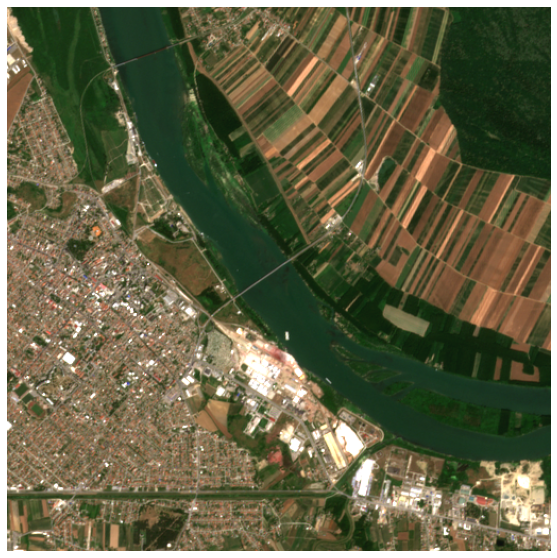

**У задацима попунити само део кода означен са 3 тарабе (###).**

Имплементирти функцију **image_loader** која учитава слику са задате локације **path**, трансформише копију слике из BGR (0-255) формата који користи OpenCV у RGB (0.0 - 1.0),а затим враћа **Tensor** слике.

In [ ]:
import torch
import cv2
import typing
from testbench import Testbench

In [ ]:
#Funkcija
def image_loader(path : str) -> torch.Tensor:
    ###

In [ ]:
'''Test'''
Testbench(image_loader)

Даље, учитавамо сет података.

In [ ]:
import torchvision
dataset_path = ###
dataset = torchvision.datasets.DatasetFolder(root=dataset_path, loader=###, extensions="jpg")

Испиши класе које се налазе у сету података!

In [ ]:
###

 Напиши функцију **split_data** која као аргументе прима листу са односом броја података за тренинг, тестирање и евалуацију, и укупан број података, а враћа број података за тренинг, тестирање и евалуацију.

In [ ]:
def split_data(ratios, dataset):
    DATASET_SEED = 12345
    torch_generator = torch.Generator().manual_seed(DATASET_SEED)
    ###

In [ ]:
'''Test'''
Testbench(split_data)

In [ ]:
train_dataset, val_dataset, test_dataset = split_data([0.7, 0.15, 0.15], dataset)

Написати функцију **getDataLoader** која прима **dataset** и **batch_size** као аргументе и ствара класу **torch.utils.data.DataLoader** са активираним следећим опцијама **shuffle**=True, **num_workers**=0, **drop_last**=True, **pin_memory**=True

In [ ]:
def getDataLoader(dataset, batch_size):
    ###

In [ ]:
'''Test'''
Testbench(getDataLoader)

Допунити следећу ћелију!

In [ ]:
BATCH_SIZE = 32

train_loader = ###
val_loader = ###

Допунити следећу ћелију! Из лоадера **train_loader** треба учитати први BATCH слика заједно са њиховим лабелама.

In [ ]:
example_batch, example_labels = ###

Допуни код у ћелији за испис прве три слике као и њихову лабелу из BATCH-a.

In [ ]:
import matplotlib as plt

In [ ]:
batch_np = example_batch.numpy()
for i in range(3):
    plt.imshow(###)
    plt.show()
    print(###)

Допунити функцију **getNN** тако да враћа мрежу са архитектуром датој на испод

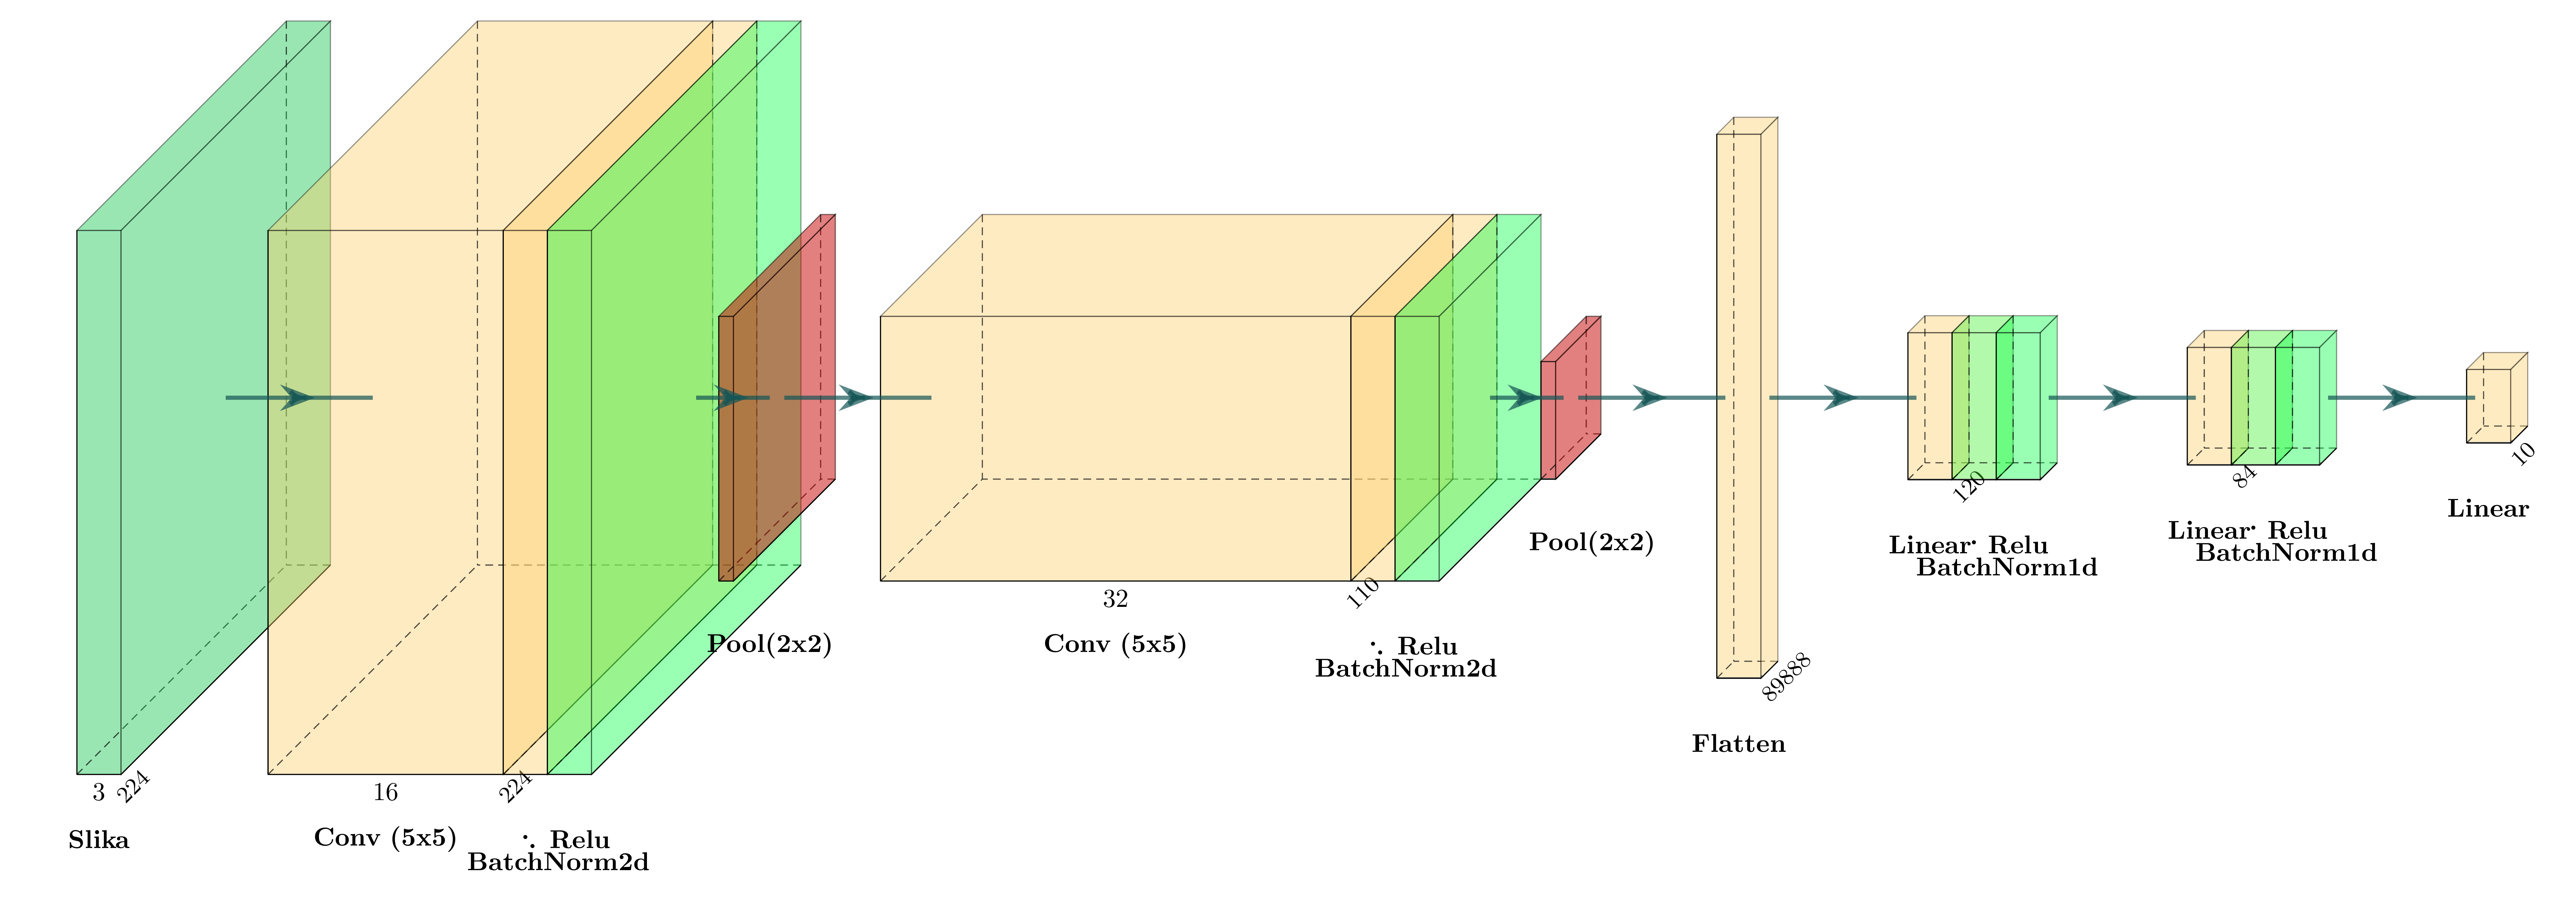

Сваки конволуциони слој има **padding = 0** и **stride = 1**

In [ ]:
import torch.nn as nn

def getNN():
    return nn.Sequential([
        ###
    ])

In [ ]:
'''Test'''
Testbench(getNN)

Даље, пребацујемо мрежу на Графичку картицу због бржег тренирања.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

Допунити код испод тако да критеријум буде **Cross Entropy Loss**, а да оптимизатор буде **Stohastic Gradient Descent** са **learning rate = 0.001**, a **momentum = 0.9**

In [ ]:
criterion = ###
optimizer = ###

Допунити функцију **measure_qulity** koja prima модел, сет података, уређај и број BATCH-ева као опциони аргумент. Функција враћа тачност мреже на датом сету података.

In [ ]:
from sklearn.metrics import accuracy_score

def measure_quality(model, loader, device, max_batches=None):
    model.###
    iteration_cnt = 0

    all_preds = list()
    all_labels = list()

    with torch.no_grad():
        for i, data in enumerate(loader):
            if max_batches is not None and iteration_cnt == max_batches:
                break

            ###

    model.###

    return accuracy_score(all_labels, all_preds)

In [ ]:
'''Test'''
Benchtest(measure_quality)

Допунити код којом се тренира модел. Тачност треба да се оцењује на подацима за евалуацију.

In [ ]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(###):
 
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.###

        outputs = ###
        loss = ###
        loss.###
        optimizer.###

        running_loss += loss.item()
        if i % 100 == 99:
            val_accuracy = ###
            print(f"epoch {epoch + 1} iter {i + 1} loss: {running_loss / 100} val accuracy: {val_accuracy}")

**Бонус питање:** Који је град са прве слике?